<a href="https://colab.research.google.com/github/MateoUsme/Esp_Analitica/blob/main/Taller_1_Probabilidad_y_Estadistica_Aplicado_a_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

replicating local resources


In [ ]:
Image("local/imgs/udea-datascience.png")

NameError: ignored

# **Fundamentos de Probabilidad y Estadística - Taller 1**
## Universidad de Antioquia

*Por favor, rellenar los siguientes datos de los integrantes:*

Nombres y apellidos de los integrantes: 

Correos electrónicos de los integrantes (Institucional - UdeA):

## Leer una base de datos

Para este taller utilizaremos un conjunto de datos del mundo real sobre la evaluación del servicio de Televisión IP: cada fila representa una medición de una trama de video enviada por IPTV; y las columnas representan parámetros o atributos de cada trama de video.


**Column Names:**
- Group of Picture (GOP): Correspone a un retraso en la transmisión de los *frames*.
- Digital Subscriber Line (DSL): Ancho de banda; un valor que se desea sea considerable.
- Packet Loss Rate (PLR): Tasa de pérdida de paquetes durante la transmisión.
- Quality of Service (QoS): Medición objetiva de la calidad del servicio en tiempo real.
- Mean Opinion Score (MOS): Medición subjetiva de la calidad del servicio por parte de los usuarios.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('IPTV.xlsx', header=None, names=['GOP','DSL','PLR','QoS','MOS'])
data

,GOP,DSL,PLR,QoS,MOS
0,16.96,0.56784,10.96827,0.294333,1.50
1,38.61,0.94530,0.98380,0.949000,5.00
2,34.60,0.89800,2.44949,0.841667,4.00
3,23.06,0.71242,7.39636,0.549300,2.25
4,18.19,0.60044,10.18556,0.475760,1.50
...,...,...,...,...,...
376,16.10,0.63396,10.65375,0.155667,1.25
377,42.88,0.96772,0.52609,0.950000,5.00
378,29.99,0.88539,3.79636,0.800667,3.75
379,23.93,0.79595,5.95574,0.386333,2.50


Hemos cargado el archivo **IPTV.xlsx** utilizando la librería **pandas**. Realice una breve exploración de este.

¿Hay datos nulos o faltantes?

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOP     381 non-null    float64
 1   DSL     381 non-null    float64
 2   PLR     381 non-null    float64
 3   QoS     381 non-null    float64
 4   MOS     381 non-null    float64
dtypes: float64(5)
memory usage: 15.0 KB


Al utilizar la funcion .info(), evidenciamos que de las 381 filas, las 5 columnas de interes tiene datos, ninguna esta vacia.

## Análisis inicial de la base de datos

Realice una exploración de los datos, tal que incluya estadísticos como la media, desviación estándar, los percentiles, así como los valores mínimos y máximos por cada columna de la base de datos.

In [5]:
data.describe()

,GOP,DSL,PLR,QoS,MOS
count,381.000000,381.000000,381.000000,381.000000,381.000000
mean,23.307848,0.684165,8.273071,0.520950,2.453412
std,8.402846,0.200037,4.695015,0.230192,1.192477
min,1.000000,0.100000,0.521200,0.103333,1.000000
25%,16.580000,0.511230,4.449470,0.338000,1.250000
50%,23.640000,0.727220,7.533120,0.497667,2.250000
75%,29.170000,0.861560,12.757570,0.686667,3.250000
max,42.940000,1.000000,16.995480,0.950000,5.000000


Muestre el comportamiento de los atributos QoS y MOS a través de histogramas.

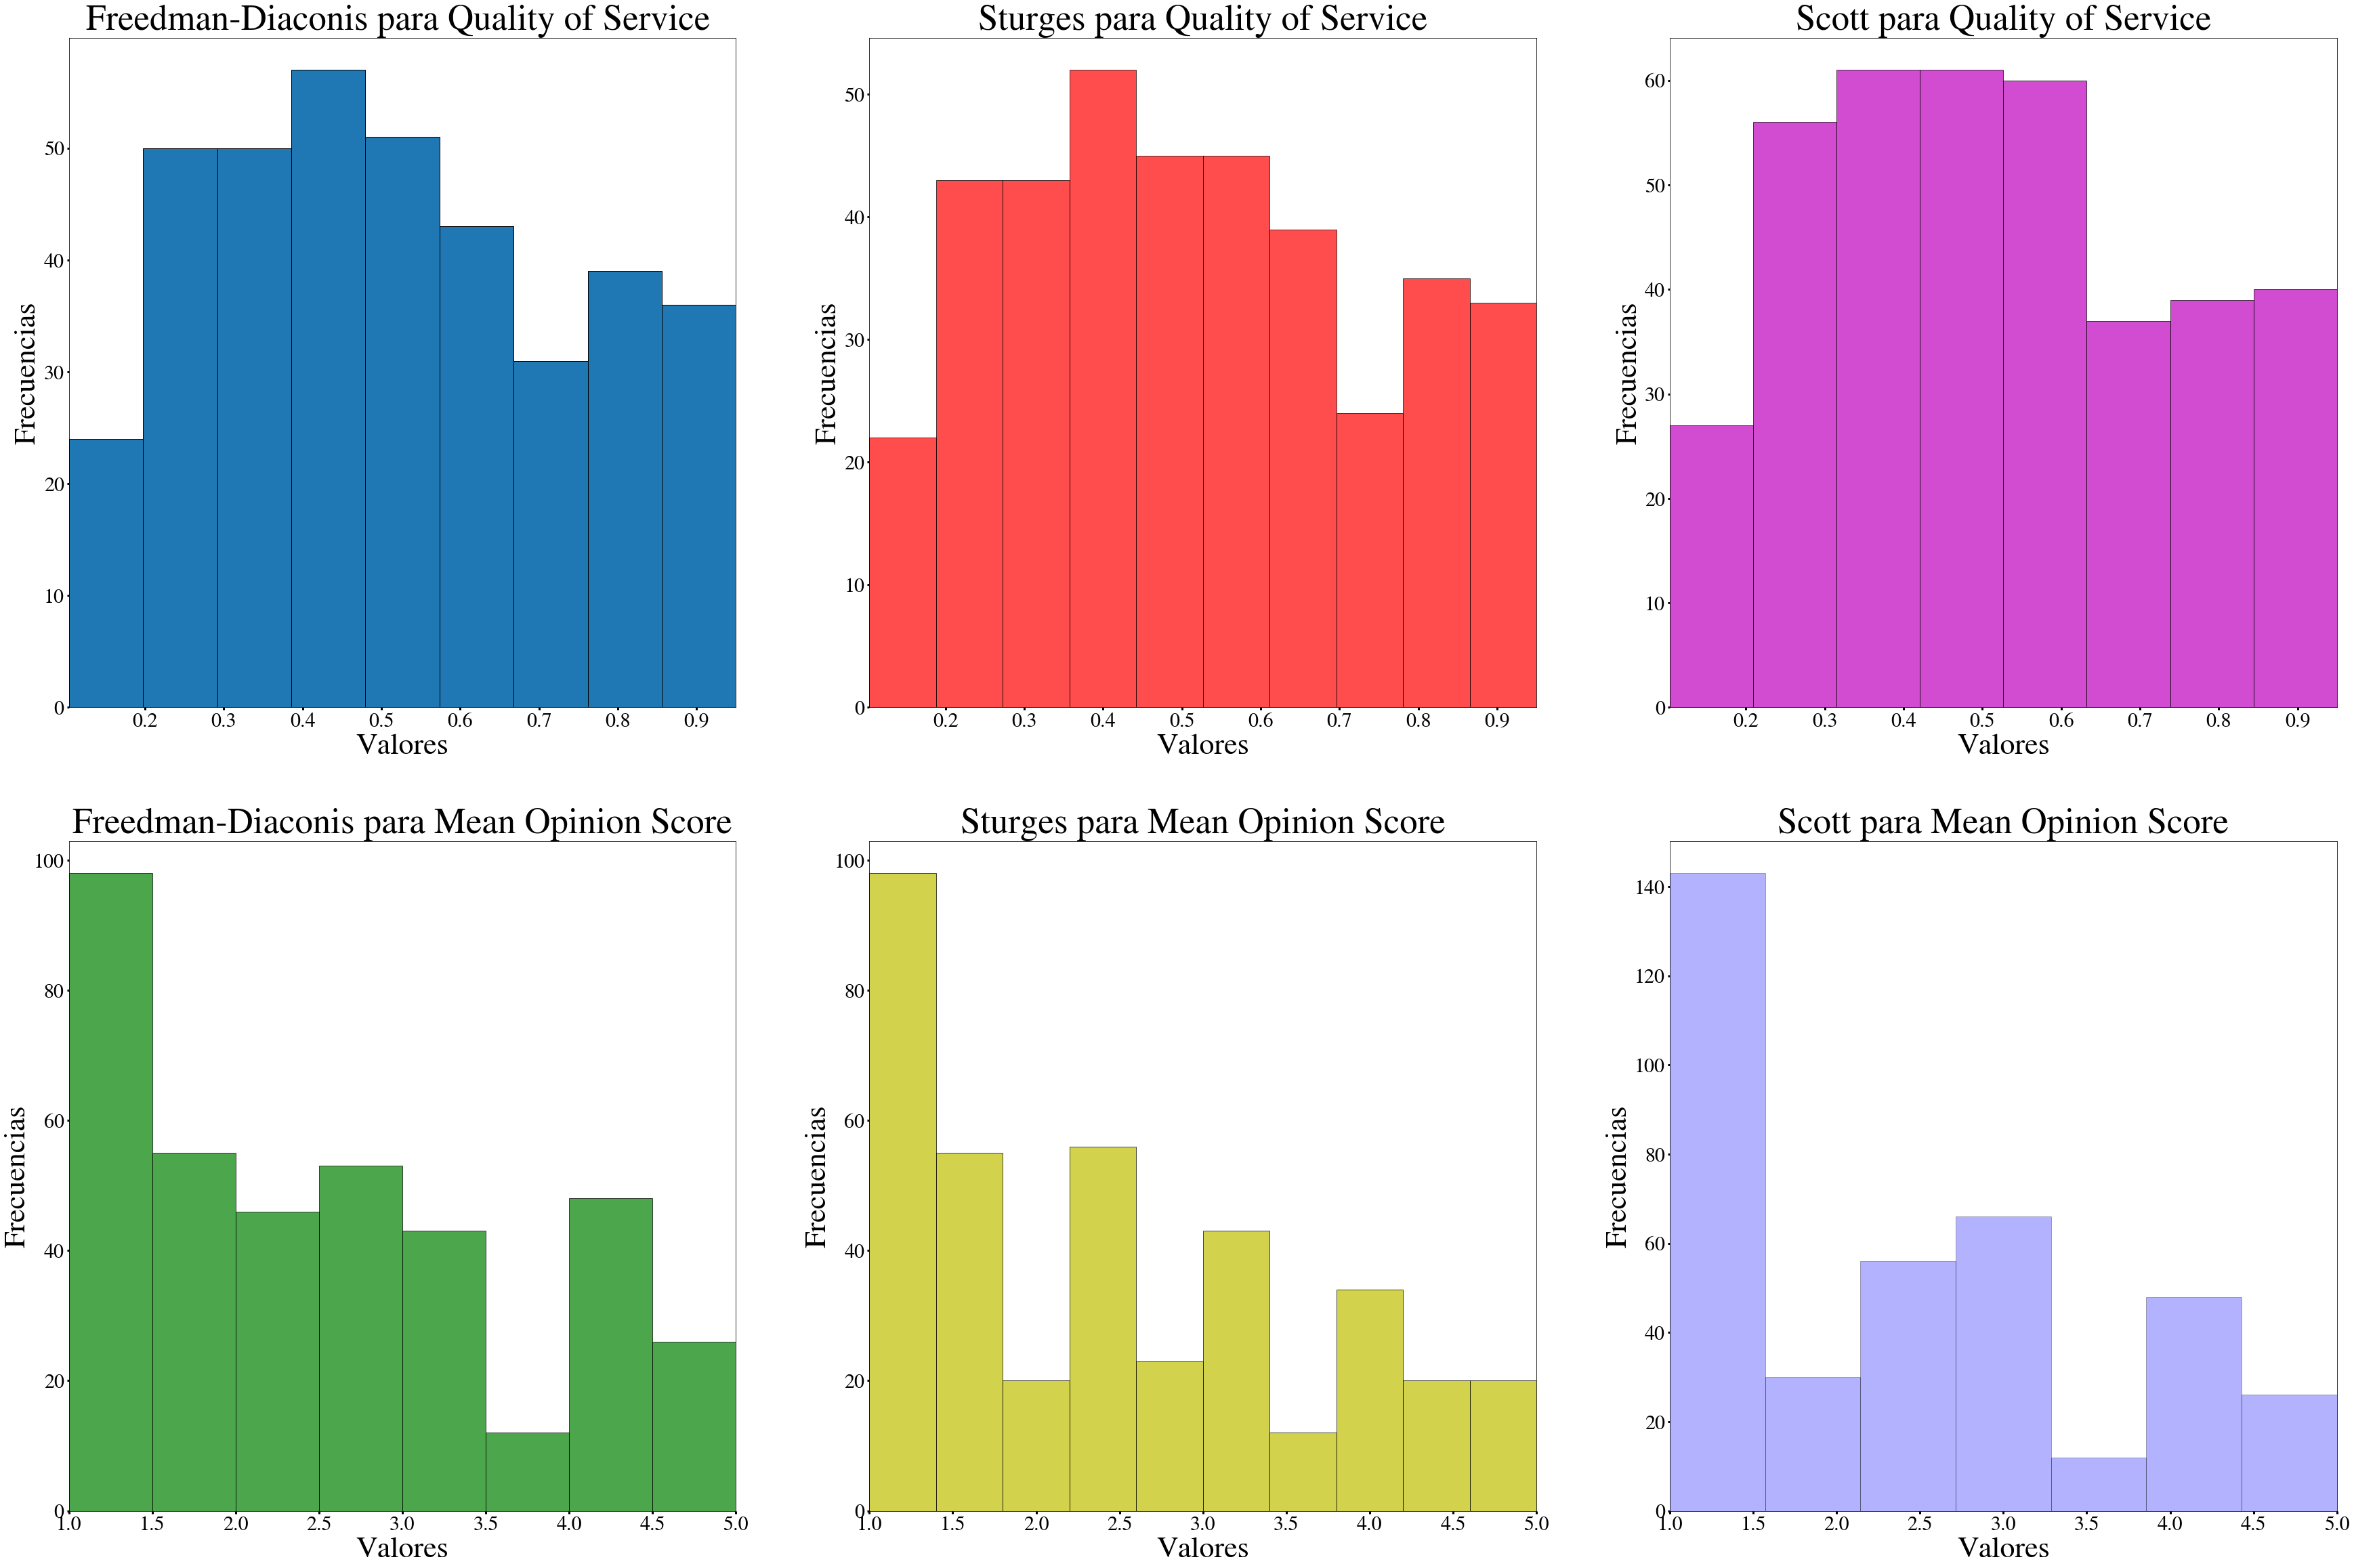

In [35]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams.update({'font.size': 44, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure(num=30, figsize=(60,40), dpi=None, facecolor="w", edgecolor="b", frameon=True)

ax = fig.add_subplot(2, 3, 1)
ax.tick_params(labelcolor='k', labelsize=30, width=3)
plt.hist(data["QoS"], bins = 'fd', alpha=1, edgecolor="k") # fd = regla de Freedman-Diaconis
plt.xlim(data["QoS"].min(), data['QoS'].max()) # Límita el valor mínimo y máximo en eje x de la gráfica
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Freedman-Diaconis para Quality of Service ')


ax = fig.add_subplot(2, 3, 2)
ax.tick_params(labelcolor='k', labelsize=30, width=3)
plt.hist(data['QoS'], bins = 'sturges', alpha=0.7, color = 'r', edgecolor="k") # Regla de Sturges
plt.xlim(data['QoS'].min(), data['QoS'].max()) # Límita el valor mínimo y máximo en eje x de la gráfica
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Sturges para Quality of Service')


ax = fig.add_subplot(2, 3, 3)
ax.tick_params(labelcolor='k', labelsize=30, width=3)
plt.hist(data['QoS'], bins = 'scott', alpha=0.7, color = 'm', edgecolor="k") # Regla de Scott
plt.xlim(data['QoS'].min(), data['QoS'].max()) # Límita el valor mínimo y máximo en eje x de la gráfica
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Scott para Quality of Service')

ax = fig.add_subplot(2, 3, 4)
ax.tick_params(labelcolor='k', labelsize=30, width=3)
plt.hist(data["MOS"], bins = 'fd', alpha=0.7,color = 'g', edgecolor="k") # fd = regla de Freedman-Diaconis
plt.xlim(data["MOS"].min(), data['MOS'].max()) # Límita el valor mínimo y máximo en eje x de la gráfica
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Freedman-Diaconis para Mean Opinion Score')

ax = fig.add_subplot(2, 3, 5)
ax.tick_params(labelcolor='k', labelsize=30, width=3)
plt.hist(data['MOS'], bins = 'sturges', alpha=0.7, color = 'y', edgecolor="k") # Regla de Sturges
plt.xlim(data['MOS'].min(), data['MOS'].max()) # Límita el valor mínimo y máximo en eje x de la gráfica
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Sturges para Mean Opinion Score')


ax = fig.add_subplot(2, 3, 6)
ax.tick_params(labelcolor='k', labelsize=30, width=3)
plt.hist(data['MOS'], bins = 'scott', alpha=0.3, color = 'b', edgecolor="k") # Regla de Scott
plt.xlim(data['MOS'].min(), data['MOS'].max()) # Límita el valor mínimo y máximo en eje x de la gráfica
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Scott para Mean Opinion Score')
plt.show()




Realice un análisis de los histogramas anteriores a través del cálculo de los cuartiles. Además, comparelos con sus respectivos valores de media y mediana.

In [7]:
# Calculando los cuartiles Medición objetiva de la calidad del servicio en tiempo real
data['QoS'].quantile([0, 0.25, 0.5, 0.75, 1])



0.00    0.103333
0.25    0.338000
0.50    0.497667
0.75    0.686667
1.00    0.950000
Name: QoS, dtype: float64

In [8]:
data['QoS'].median(),data['QoS'].mean()

(0.497666667, 0.5209503674619415)

In [9]:
# Calculando los cuartiles Medición subjetiva de la calidad del servicio por parte de los usuarios
data['MOS'].quantile([0, 0.25, 0.5, 0.75, 1])

0.00    1.00
0.25    1.25
0.50    2.25
0.75    3.25
1.00    5.00
Name: MOS, dtype: float64

In [10]:
data['MOS'].median(),data['MOS'].mean()

(2.25, 2.4534120734908136)

**Realice los siguientes ejercicios para el atributo QoS**

Utilice otras reglas **vistas en clase** para calcular los cuartiles y el ancho de las particiones: muestre las gráficas y haga una comparación entre ellas.

In [11]:
data['QoS'].quantile([0, 0.25, 0.5, 0.75, 1], interpolation = 'lower')

0.00    0.103333
0.25    0.338000
0.50    0.497667
0.75    0.686667
1.00    0.950000
Name: QoS, dtype: float64

In [12]:
data['QoS'].quantile([0, 0.25, 0.5, 0.75, 1], interpolation = 'higher')

0.00    0.103333
0.25    0.338000
0.50    0.497667
0.75    0.686667
1.00    0.950000
Name: QoS, dtype: float64

In [13]:
data['QoS'].quantile([0, 0.25, 0.5, 0.75, 1], interpolation = 'nearest')

0.00    0.103333
0.25    0.338000
0.50    0.497667
0.75    0.686667
1.00    0.950000
Name: QoS, dtype: float64

In [14]:
data['QoS'].quantile([0, 0.25, 0.5, 0.75, 1], interpolation = 'midpoint')

0.00    0.103333
0.25    0.338000
0.50    0.497667
0.75    0.686667
1.00    0.950000
Name: QoS, dtype: float64

Utilice otros métodos de **interpolación** para el cálculo de los cuartiles ¿Qué sucede al utilizar diferentes métodos? ¿Por qué se presenta este comportamiento? ¿Qué puede decir de esto con respecto al tamaño del conjunto de datos?

## Análisis por grupos de datos

Deseamos analizar los atributos de las tramas de video con respecto a las propiedades de calidad QoS y MOS. 

Realice un análisis en el que haga una comparación entre la calidad del servicio en tiempo real, y la calidad del servicio percibido. Presente resultados a través de gráficos de barras.

Haga comentarios sobre lo que observa de estas dos medidas de calidad (distribuciones, medidas de tendencia central).

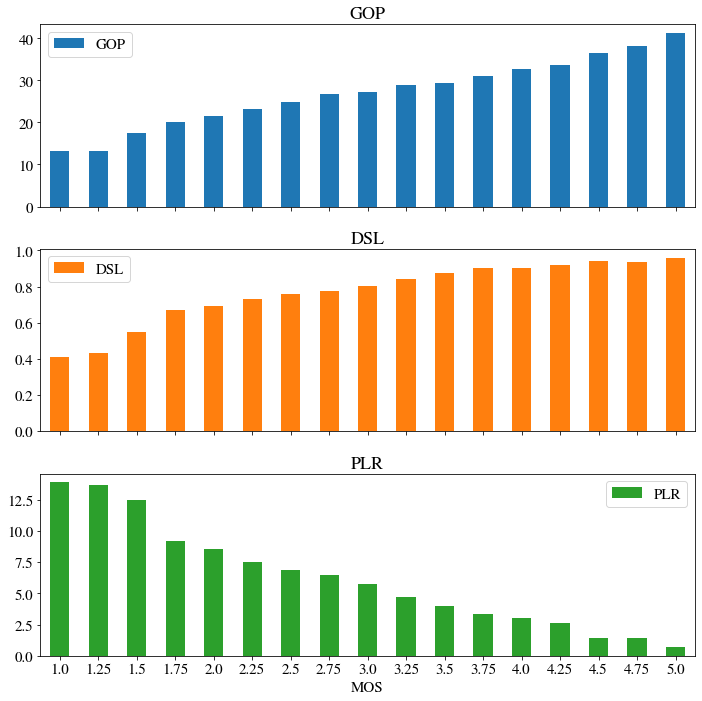

In [15]:
matplotlib.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
Mos_data = data.copy()
del Mos_data["QoS"]
Mos_data.groupby("MOS").mean().plot.bar(figsize=(10,10),rot=0,subplots=True)
plt.tight_layout()

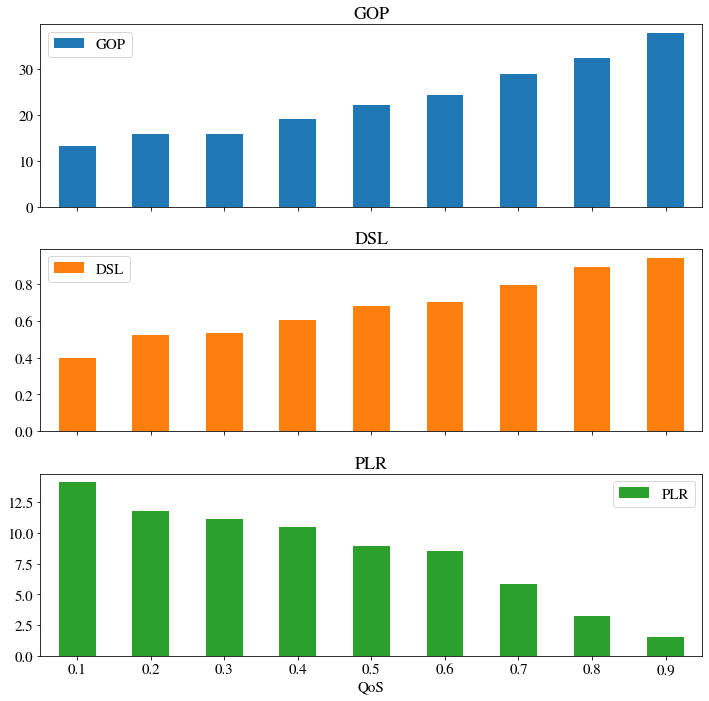

In [16]:
Qos_data = data.copy()
del Qos_data["MOS"]
Qos_data["QoS"] = Qos_data["QoS"].apply(lambda x: round(x,1))
Qos_data.groupby("QoS").mean().plot.bar(figsize=(10,10),rot=0,subplots=True)
plt.tight_layout()

## Aplicando la función de probabilidad Gaussiana con la base de datos

Realice el siguiente análisis a partir de las dos medidas de calidad: QoS y MOS.

Grafique las funciones de densidad de probabilidad de estos atributos; luego, a través de la función de densidad de probabilidad acumulada calcule:

- La probabilidad de observar una calidad del servicio superior a 3 para MOS.
- La probabilidad de observar una calidad máxima del servicio para MOS.
- La probabilidad de observar una calidad del servicio superior a 0.75 para QoS.
- La probabilidad de observar una calidad máxima del servicio para QoS.

Discuta los resultados obtenidos.

<Figure size 800x600 with 0 Axes>

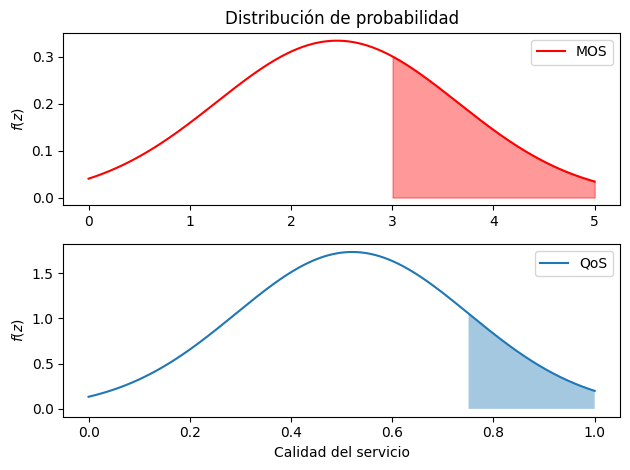

In [65]:
from scipy.stats import norm

# Defino las distribuciones con sus respectivos parametros 

distr_MOS= norm(loc = data['MOS'].mean(), scale = data['MOS'].std())
distr_QoS= norm(loc = data['QoS'].mean(), scale = data['QoS'].std())

plt.rcdefaults()
plt.figure(figsize = (8,6))

fig, (ax1, ax2) = plt.subplots(2)

x = np.linspace(0,5,1000)
ax1.plot(x,distr_MOS.pdf(x), label ='MOS', c="r")
ax1.fill_between(x, 0, distr_MOS.pdf(x), where=((x>3)), alpha = 0.4, color="r")
ax1.set_ylabel('$f(z)$')

x = np.linspace(0,1,1000)
ax2.plot(x,distr_QoS.pdf(x), label ='QoS')
ax2.fill_between(x, 0, distr_QoS.pdf(x), where=((x>0.75)), alpha = 0.4)
ax2.set_ylabel('$f(z)$')

ax1.legend()
ax2.legend()
plt.xlabel('Calidad del servicio')
ax1.set_title('Distribución de probabilidad')
plt.tight_layout()

In [66]:
print(f"La probabilidad de observar una calidad del servicio superior a 3 para MOS es de {1-distr_MOS.cdf(3) :.1%} ") 
print(f"La probabilidad de observar una calidad máxima del servicio para MOS {1-distr_MOS.cdf(5) :.1%}") 
print(f"La probabilidad de observar una calidad del servicio superior a 0.75 para QoS es de {1-distr_QoS.cdf(0.75) :.1%} ") 
print(f"La probabilidad de observar una calidad máxima del servicio para QoS es de {1-distr_QoS.cdf(1) :.1%}")

La probabilidad de observar una calidad del servicio superior a 3 para MOS es de 32.3% 
La probabilidad de observar una calidad máxima del servicio para MOS 1.6%
La probabilidad de observar una calidad del servicio superior a 0.75 para QoS es de 16.0% 
La probabilidad de observar una calidad máxima del servicio para QoS es de 1.9%


## Densidad Kernel con la base de datos

Realice para los atributos QoS y MOS, una aproximación con densidad de Kernel; determine si la densidad de Kernel corresponde a una posible distrubución Gaussiana; analicelo con el nivel de confianza del 95%.

In [17]:
data

,GOP,DSL,PLR,QoS,MOS
0,16.96,0.56784,10.96827,0.294333,1.50
1,38.61,0.94530,0.98380,0.949000,5.00
2,34.60,0.89800,2.44949,0.841667,4.00
3,23.06,0.71242,7.39636,0.549300,2.25
4,18.19,0.60044,10.18556,0.475760,1.50
...,...,...,...,...,...
376,16.10,0.63396,10.65375,0.155667,1.25
377,42.88,0.96772,0.52609,0.950000,5.00
378,29.99,0.88539,3.79636,0.800667,3.75
379,23.93,0.79595,5.95574,0.386333,2.50


In [25]:
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KernelDensity

def graf_att(att, bandwith):
  atributo = att

  matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

  fig = plt.figure(figsize=(12,8))

  plt.hist(data[atributo], bins = 'fd', alpha=0.7, density = True, edgecolor="k") # fd = regla de Freedman-Diaconis
  plt.xlim(data[atributo].min(), data[atributo].max()) # Límita el valor mínimo y máximo en eje x de la gráfica
  plt.xlabel('Calidad de servicio percibida por usuarios')
  plt.ylabel('Probabilidad')
  plt.title('Histograma de '+ atributo)

  kde = KernelDensity(bandwidth=bandwith, kernel='gaussian')
  datos_mos = data[atributo].values
  datos_mos = datos_mos.reshape(-1, 1) # Es importante que los datos esten entre 1 y -1
  kde.fit(datos_mos)

  x = np.linspace(data[atributo].min(),data[atributo].max(),data.shape[0])
  Prob_Log = kde.score_samples(x.reshape(-1, 1))

  dic = {"MOS": "Calidad de servicio percibida por usuarios", "QoS":"Calidad de servicio en tiempo real"}
  plt.plot(x, np.exp(Prob_Log), 'r', linewidth = 4) # Se muestra la función de densidad de probabilidad estimado por densidad kernel
  plt.xlabel(dic[atributo])
  plt.ylabel("Probabilidad")
  plt.title('Densidad de Kernel de '+ atributo)

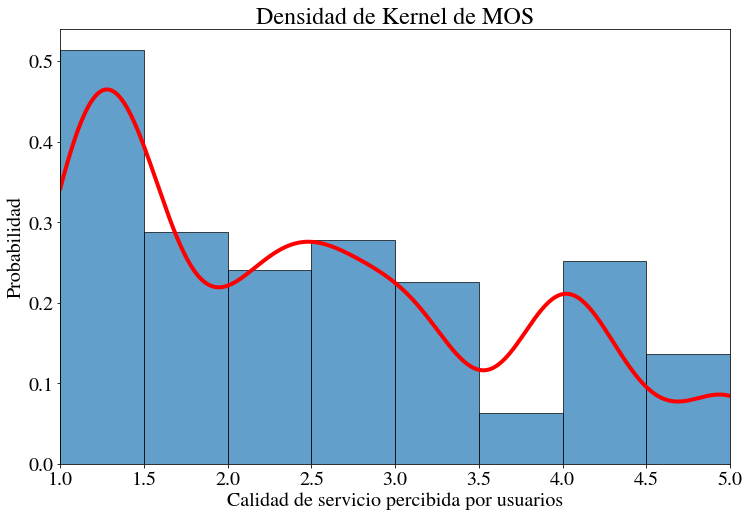

In [26]:
graf_att("MOS", bandwith=0.25)

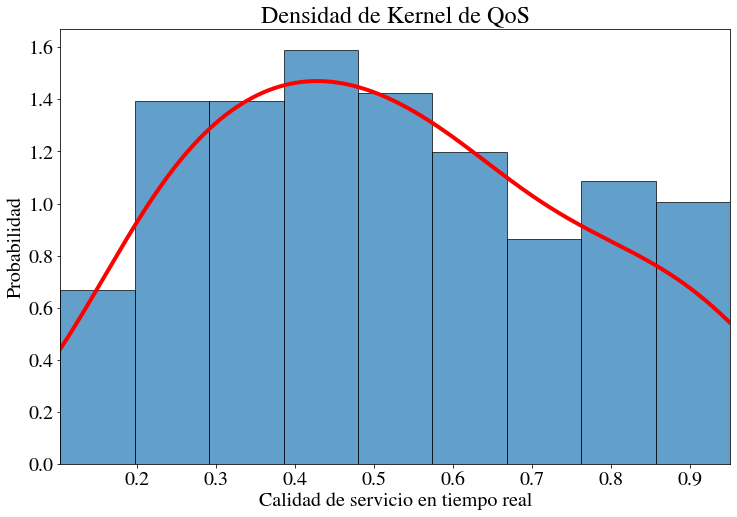

In [27]:
graf_att("QoS",bandwith= 0.1)

Aplique otra función kernel diferente a la Gaussiana: cosine, epanechnikov, exponential, linear, tophat.

In [28]:
kernels = ['gaussian', 'cosine', 'epanechnikov', 'exponential', 'linear', 'tophat']
colores = ['r', 'm', 'g', 'brown', 'ForestGreen', 'orange']

def graf_varios_kernels(atributo, bandwidth):
  fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
  arreglo = np.arange(6) + 231
  x = np.linspace(data[atributo].min(),data[atributo].max(),data.shape[0])

  datos_kernel = data[atributo].values
  datos_kernel = datos_kernel.reshape(-1, 1)

  for k, indice in zip(kernels, arreglo):
      kde = KernelDensity(kernel=k, bandwidth = bandwidth)
      kde.fit(datos_kernel)
      Prob_Log = kde.score_samples(x.reshape(-1, 1))
      plt.subplot(indice)
      plt.fill_between(x, np.exp(Prob_Log), alpha = 0.5, color = 'm')
      plt.plot(x, np.exp(Prob_Log), 'r', linewidth = 4) # Se muestra la función de densidad de probabilidad estimado por densidad kernel
      plt.hist(data[atributo], bins = 'fd', alpha=0.6, density = True) # fd = regla de Freedman-Diaconis
      dic = {"MOS": "Calidad de servicio percibida por usuarios", "QoS":"Calidad de servicio en tiempo real"}
      plt.xlabel(dic[atributo])
      plt.ylabel("Probabilidad")
      plt.title(k)

  fig.subplots_adjust(hspace=0.5, wspace=.3)
  plt.show()

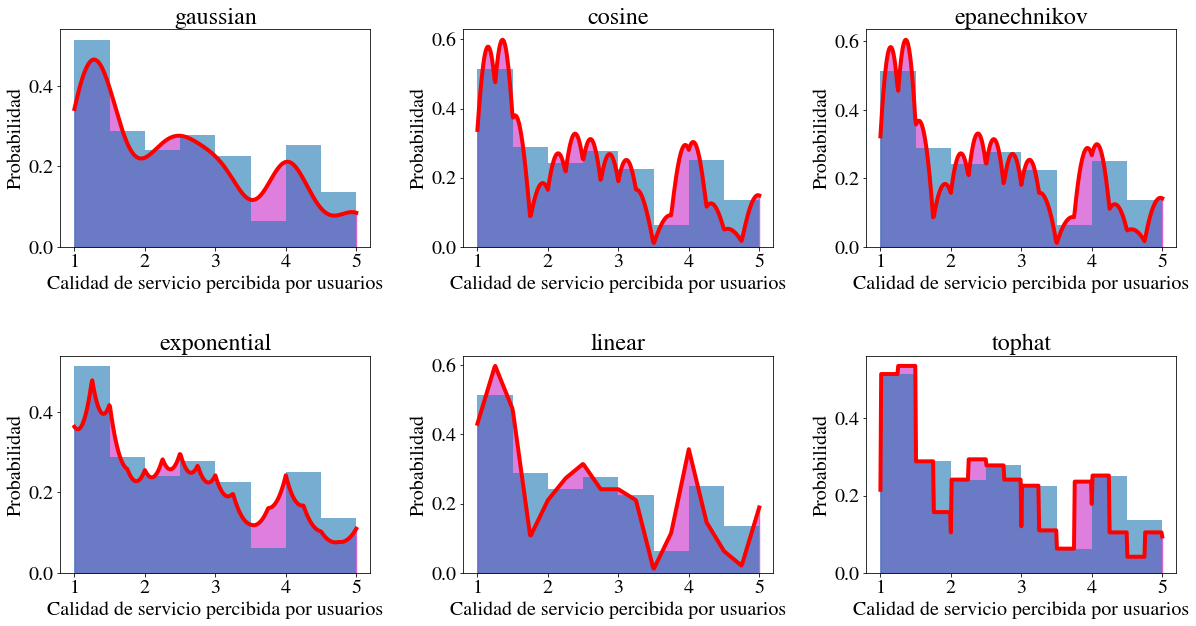

In [29]:
graf_varios_kernels("MOS", bandwidth=0.25)

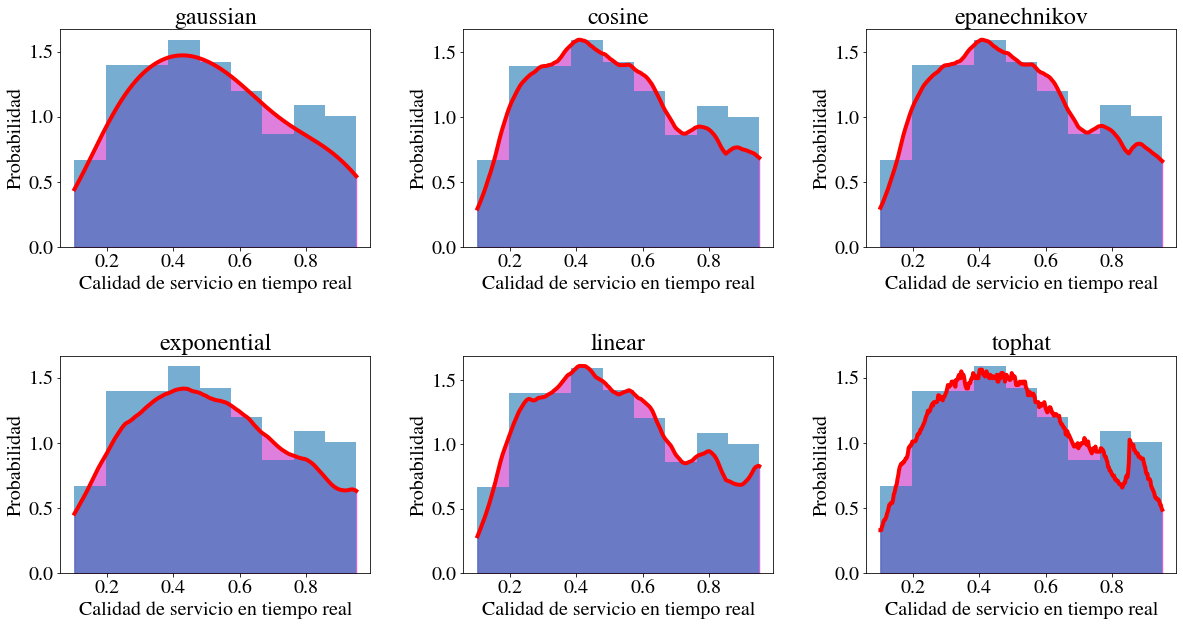

In [30]:
graf_varios_kernels("QoS", bandwidth=0.1)

Realice comentarios sobre los resultados que obtuvo.

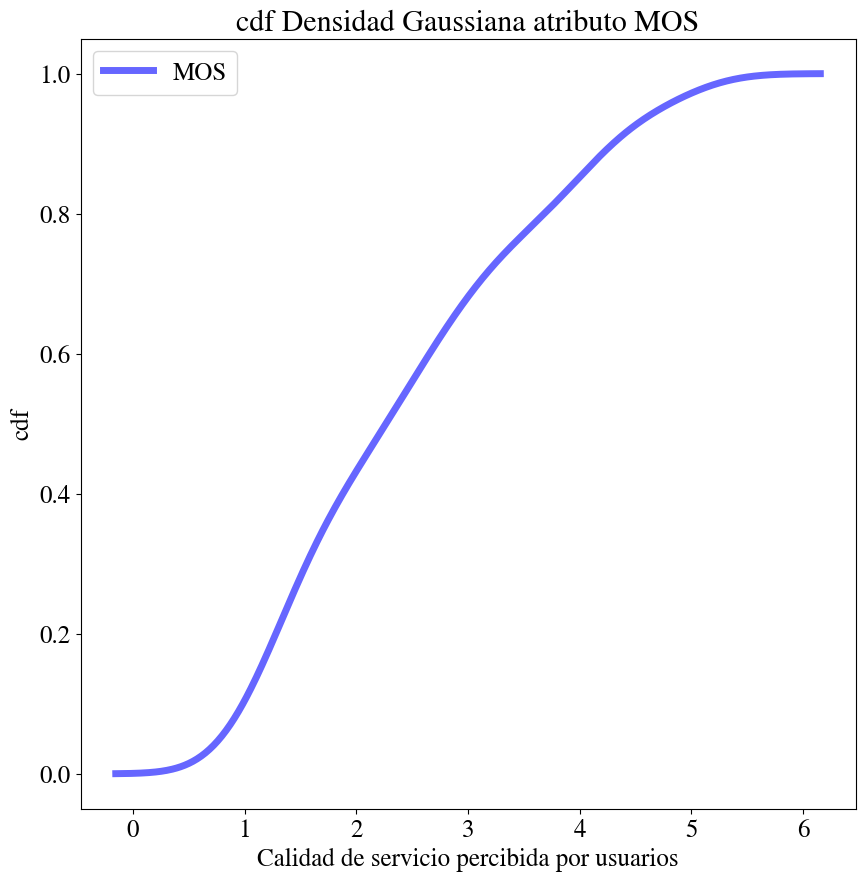

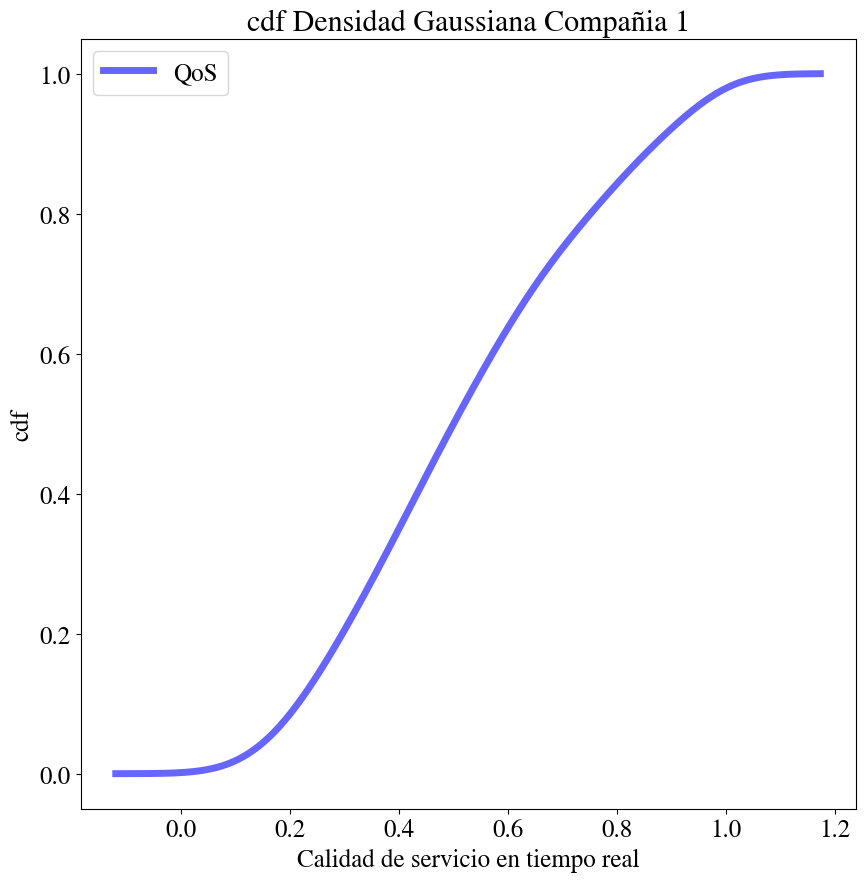

In [74]:
from statsmodels.nonparametric.kde import kernel_switch
import statsmodels.api as sm
kde1 = sm.nonparametric.KDEUnivariate(data["MOS"])
kde1.fit(kernel = 'gau')
kde2 = sm.nonparametric.KDEUnivariate(data["QoS"])
kde2.fit(kernel = 'gau')
import matplotlib
from matplotlib import pyplot as plt

y1 = kde1.density # Probabilidades
p1_cdf = kde1.cdf # función de densidad de probabilidad acumulada
x1_cdf = kde1.support 

y2 = kde2.density # Probabilidades
p2_cdf = kde2.cdf # función de densidad de probabilidad acumulada
x2_cdf = kde2.support 

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

plt.figure(figsize=(10,10))
plt.plot(x1_cdf, p1_cdf, 'b-', lw = 5, alpha = 0.6, label='cdf Gaussiano')
plt.xlabel('Calidad de servicio percibida por usuarios')
plt.ylabel('cdf')
plt.title('cdf Densidad Gaussiana atributo MOS')
plt.legend(["MOS"])

plt.figure(figsize=(10,10))
plt.plot(x2_cdf, p2_cdf, 'b-', lw = 5, alpha = 0.6, label='cdf Gaussiano')
plt.xlabel('Calidad de servicio en tiempo real')
plt.ylabel('cdf')
plt.title('cdf Densidad Gaussiana Compañia 1')
plt.legend(["QoS"])

plt.show()

In [71]:
import scipy.stats as stats

kde = KernelDensity(kernel='gaussian', bandwidth = 1)
datos = data.QoS.values.reshape(-1,1)
kde.fit(datos)
y = kde.sample(500)
normed_data=(y-y.mean())/y.std() # Se normaliza Media cero, desv cero
print(stats.kstest(normed_data,'norm'))

KstestResult(statistic=0.9992064716800013, pvalue=0.0)


In [73]:
kde = KernelDensity(kernel='gaussian', bandwidth = 1)
datos = data.MOS.values.reshape(-1,1)
kde.fit(datos)
y = kde.sample(500)
normed_data=(y-y.mean())/y.std() # Se normaliza Media cero, desv cero
print(stats.kstest(normed_data,'norm'))

KstestResult(statistic=0.9996949337023326, pvalue=0.0)


## Problema de Clasificación

Utilizando lo aprendido en la sesión 1.2, aborde un problema de clasificación con el conjunto de datos de este notebook, así:

- Variables de entrada: GOP, DSL, PLR, QoS
- Variable objetivo: **MOS**. Esta variable oscila entre 1 y 5, cuyos valores son en punto flotante; realice un redondeo a entero positivo tal que los valores sean 1,2,3,4,5; es decir, las clases.
- División Train/Test: 70%/30%
- Algoritmos: Análisis Discriminante Lineal o Naive Bayes (*Opcional*: Modelo de Mezclas Gaussiana).
- Métricas de desempeño: Score o F1-Score o Matriz de Confusión.




## Conclusiones Generales del Taller